# Chart 5

<img src="../charts/63cLE-over-2000-instances-of-damaged-civilian-structures-were-documented.png" alt="Chart as shown on original article]" width="700"/>

Bellingcat provides the data from their open source intelligence database in JSON format. We parsed and used it for the Datawrapper chart.

In [1]:
# Import packages
import pandas as pd

In [2]:
# Read JSON
df = pd.read_json("../data/Bellingcat/ukr-civharm-2025-02-03.json")

In [3]:
# Getting a datetime
df['datetime'] = pd.to_datetime(df.date, format='%m/%d/%Y')

In [4]:
# Setting datetime as index
df = df.set_index('datetime')

<Axes: xlabel='datetime'>

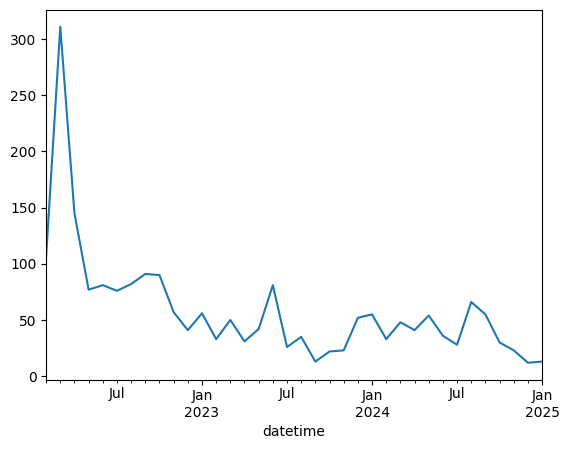

In [5]:
# Shape is similar to the UN civiliam casualty data, suggesting that they are capturing a same trend
df.resample('M').id.count().plot()

In [6]:
# Function to parse filters of the JSON file
def get_keys(row):
    
    filters = row.filters
    
    for item in filters:
        
        k,v = item.items()
        return pd.Series({k[1]:v[1]})

In [7]:
# Apply the function to have the filters as columns
filters = df.apply(get_keys, axis=1)


In [8]:
# Join dataset with the new columns
df = pd.concat([df, filters], axis=1)

In [9]:
# Creates a summary by tipe
summary = df['Type of area affected'].value_counts().reset_index().rename(columns={
    "index": "Type of area affected", "Type of area affected": "count"
})

In [10]:
summary.head()

,Type of area affected,count
0,Residential,927
1,Commercial,250
2,School or childcare,223
3,Industrial,130
4,Healthcare,99


In [11]:
# Save the data
summary.to_csv("../output/attacks-by-type-of-area-affected.csv", index=False)

In [12]:
# Examples of descriptions provided
df[df['Type of area affected']=='Military'].iloc[4]['description']

'Military Institute of Telecommunications and Information Technologies destroyed after a strike, reportedly killing 58 people and injuring 328 people.'

In [13]:
df[df['Type of area affected']=='Undefined'].iloc[9]['sources']

[{'id': 'src2677',
  'path': 'https://t.me/suspilnezaporizhzhya/12354',
  'description': 'Aftermath of reported strikes; two people reportedly wounded.'},
 {'id': 'src2678',
  'path': 'https://suspilne.media/456144-protagom-minuloi-dobi-armia-rf-zavdala-ponad-100-udariv-po-zaporizkij-oblasti-e-poraneni/',
  'description': 'Aftermath of reported strikes; two people reportedly wounded.'},
 {'id': 'src2679',
  'path': 'https://zp.npu.gov.ua/news/obstriliani-budynky-ta-punkt-nadannia-humdopomohy-naslidky-zbroinoi-ataky-na-zaporizhzhi-zadokumentuvaly-politseiski',
  'description': 'Aftermath of reported strikes; two people reportedly wounded.'}]